In [ ]:
path = "/content/drive/MyDrive/BracU/Summer-21/AAI/Project"
from google.colab import drive
drive.mount("/content/drive")
%cd $path

**Stock Price Prediction using HMM [closing-difference]**

In [41]:
import numpy as np
import pandas as pd
import datetime
#from pandas_datareader import data 
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import YearLocator, MonthLocator
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
company_code = 'ACI'
#input('Company Name:').upper()
lastN = 20
#int(input('Days:'))

stocks = pd.read_csv('./company_data/{company}.csv'.format(company=company_code))
#print(stocks.head())
print((stocks.head()).to_markdown(tablefmt="grid"))
print(stocks.info(verbose=False))
#print(stocks.describe())

stocks.reset_index(inplace=True,drop=True)
stocks.drop(['open','high','low','prev_closing_price'],axis=1,inplace=True)
stocks['date'] = pd.to_datetime(stocks['date'])
stocks['date'] = stocks['date'].apply(datetime.datetime.toordinal)
print((stocks.head()).to_markdown(tablefmt="grid"))

stocks = list(stocks.itertuples(index=False, name=None))

+----+------------+--------+--------+-------+---------+----------+----------------------+
|    | date       |   open |   high |   low |   close |   volume |   prev_closing_price |
+====+============+========+========+=======+=========+==========+======================+
|  0 | 2008-03-06 |  200   |  202   | 194   |   195.5 |   266850 |                198.8 |
+----+------------+--------+--------+-------+---------+----------+----------------------+
|  1 | 2008-03-09 |  199.8 |  199.8 | 194   |   195   |   333600 |                195.5 |
+----+------------+--------+--------+-------+---------+----------+----------------------+
|  2 | 2008-03-09 |  199.8 |  199.8 | 194   |   195   |   333600 |                195.5 |
+----+------------+--------+--------+-------+---------+----------+----------------------+
|  3 | 2008-03-10 |  196.5 |  209.5 | 195.4 |   207.3 |   381650 |                195   |
+----+------------+--------+--------+-------+---------+----------+----------------------+
|  4 | 200

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(stocks, test_size=.2, shuffle=False)

In [7]:
stocks = train_data

dates = np.array([x[0] for x in stocks], dtype=int)
print(dates)
close_price = np.array([x[1] for x in stocks])
print(close_price)
volume = np.array([x[2] for x in stocks])[1:]
print(volume)

[733107 733110 733110 ... 736801 736802 736803]
[195.5 195.  195.  ... 402.2 403.  403.8]
[333600 333600 381650 ...  72144  61085  50063]


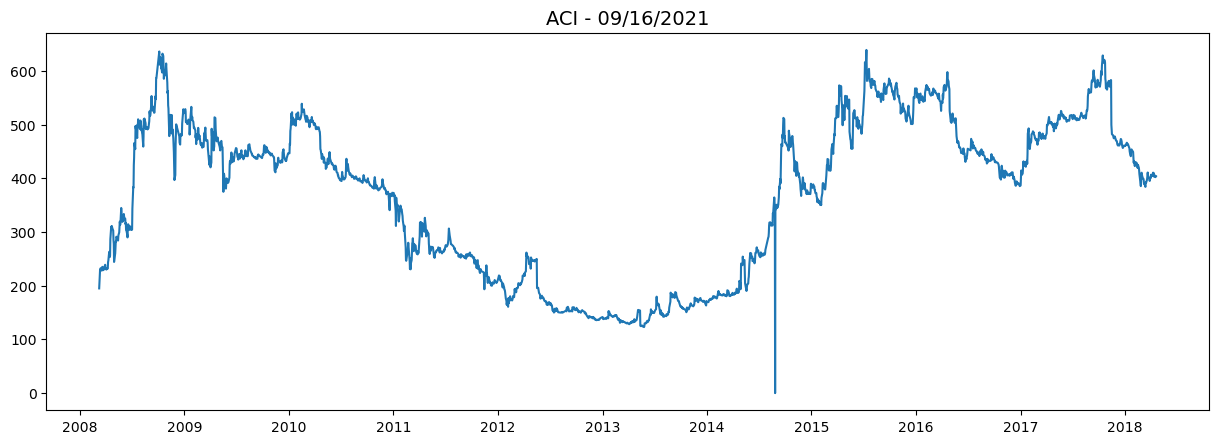

In [8]:
diff = np.diff(close_price)
dates = dates[1:]
close_price = close_price[1:]

start_date = datetime.date(2008, 1, 1)
end_date = datetime.date.today()
actual_date = [datetime.date.fromordinal(x) for x in dates]

X = np.column_stack([diff, volume])
plt.figure(figsize=(15, 5), dpi=100) 
plt.title(company_code + " - " + end_date.strftime("%m/%d/%Y"), fontsize = 14)
plt.gca().xaxis.set_major_locator(YearLocator())
plt.plot_date(actual_date,close_price,"-")
plt.show()

In [9]:
#actual_date = [datetime.date.fromordinal(x) for x in dates[1:]]
data = list(zip(actual_date[1:], close_price, diff))
data =  pd.DataFrame(data, columns=['Date','Closing Price', 'Difference'])
print((data.head()).to_markdown(tablefmt='grid'))

+----+------------+-----------------+--------------+
|    | Date       |   Closing Price |   Difference |
+====+============+=================+==============+
|  0 | 2008-03-09 |           195   |         -0.5 |
+----+------------+-----------------+--------------+
|  1 | 2008-03-10 |           195   |          0   |
+----+------------+-----------------+--------------+
|  2 | 2008-03-11 |           207.3 |         12.3 |
+----+------------+-----------------+--------------+
|  3 | 2008-03-12 |           215.5 |          8.2 |
+----+------------+-----------------+--------------+
|  4 | 2008-03-13 |           229.2 |         13.7 |
+----+------------+-----------------+--------------+


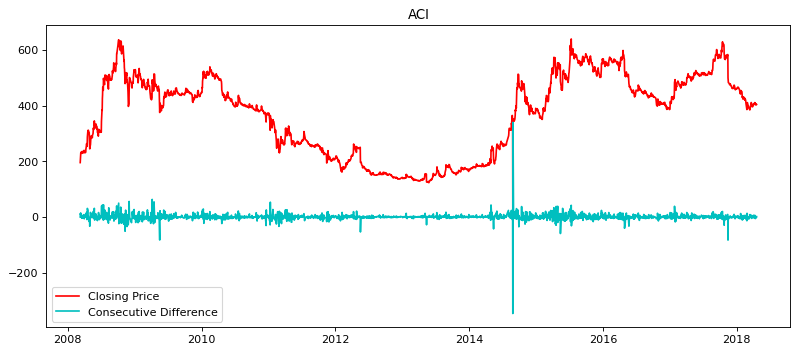

In [17]:
plt.figure(figsize=(12, 5), dpi=80 )
plt.title(company_code, fontsize = 12)
plt.plot(actual_date,close_price,'r-')
plt.plot(actual_date,diff, 'c-')
plt.legend(['Closing Price','Consecutive Difference'])
plt.show()

hmm.GMMHMM(n_components=1, n_mix=1, min_covar=0.001, startprob_prior=1.0, transmat_prior=1.0, weights_prior=1.0, means_prior=0.0, means_weight=0.0, covars_prior=None, covars_weight=None, algorithm='viterbi', covariance_type='diag', random_state=None, n_iter=10, tol=0.01, verbose=False, params='stmcw', init_params='stmcw')

## HMMLearn Model and Visualization

In [19]:
#n_comp = int(input('Number of Components:'))
model = GaussianHMM(n_components=4,  n_iter=10000, tol=0.001)
#model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=10000, params="stmc", init_params="stmc")
model.fit(X)

GaussianHMM(n_components=4, n_iter=10000, tol=0.001)

In [20]:
model.monitor_

ConvergenceMonitor(
    history=[-42713.357933686595, -39655.63514341477, -38598.52788541917, -38184.52200679614, -37904.92340282676, -37718.31211051054, -37596.976998095415, -37514.50982702158, -37457.98701977785, -37421.295187547395, -37390.83110956998, -37364.4922864562, -37346.46276512091, -37333.68846473835, -37325.39509945948, -37320.73943330997, -37317.7635302298, -37315.63227269397, -37314.01559851876, -37312.75461735033, -37311.75560001106, -37310.95579582404, -37310.3108473065, -37309.78810110769, -37309.36203034975, -37309.0112408091, -37308.71679234149, -37308.46167766966, -37308.23175691111, -37308.01830842524, -37307.82037376384, -37307.64312894256, -37307.49197833745, -37307.367910596535, -37307.26766528132, -37307.186332425605, -37307.11932392764, -37307.06306007494, -37307.01493338709, -37306.97306605055, -37306.93608204175, -37306.90294392861, -37306.8728457291, -37306.84514349581, -37306.81930916668, -37306.7948984124, -37306.77152697725, -37306.748852207566, -37306.

In [21]:
import pickle

#with open("{0}_ncomp_{1}_niter_{2}.pkl".format(company_code, model.n_components, model.n_iter), "wb") as file: pickle.dump(model, file)
#model = pickle.load(open("ACI_ncomp_20_niter_10000.pkl", 'rb'))
#hidden_states = model.predict(X)

In [22]:
stocks = test_data

dates = np.array([x[0] for x in stocks], dtype=int)
close_price = np.array([x[1] for x in stocks])
volume = np.array([x[2] for x in stocks])[1:]

In [23]:
diff = np.diff(close_price)
dates = dates[1:]
close_price = close_price[1:]

X = np.column_stack([diff, volume])
hidden_states = model.predict(X)

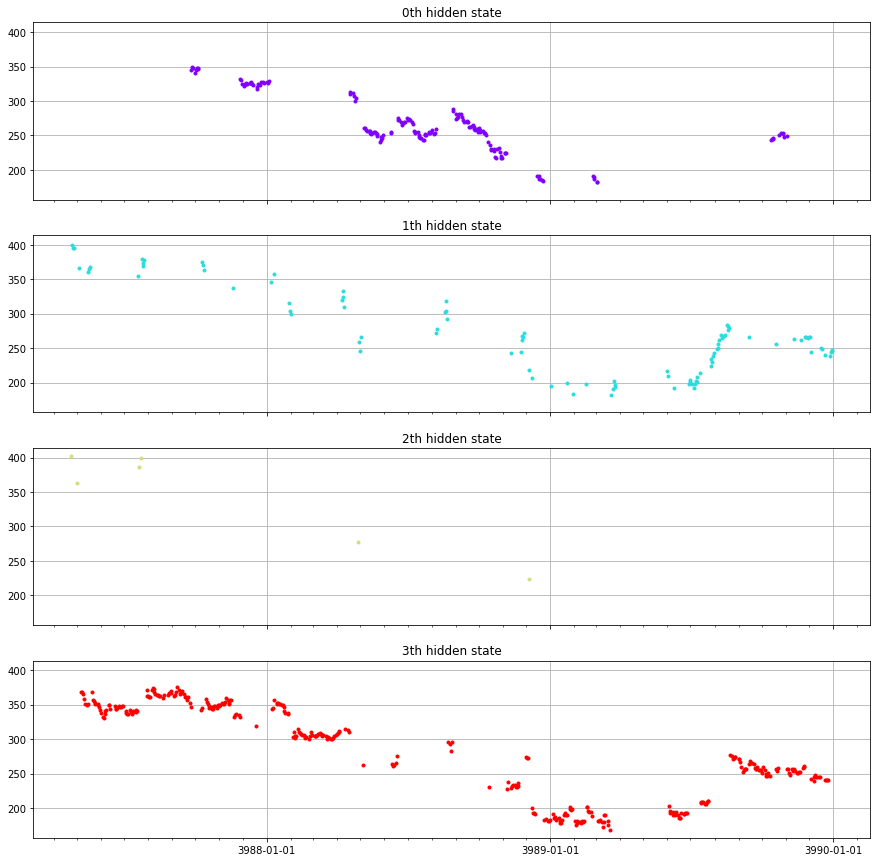

In [24]:
# From HMMLearn Documentation.....

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(15,15))
colours = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, colour) in enumerate(zip(axs, colours)):
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_price[mask], ".", c=colour)
    ax.set_title("{0}th hidden state".format(i))
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    ax.grid(True)
plt.show()

In [25]:
expected_returns_and_volumes = np.dot(model.transmat_, model.means_)
returns_and_volume = list(zip(*expected_returns_and_volumes))
#predicted price
expected_returns = returns_and_volume[0]
expected_volumes = returns_and_volume[1]
params = pd.concat([pd.Series(expected_returns), pd.Series(expected_volumes)], axis=1)
params.columns= ['Returns', 'Volume']
params.head()

,Returns,Volume
0,-0.346299,13333.502462
1,-0.052328,124625.964238
2,2.498982,284131.581267
3,-0.691174,49629.846051


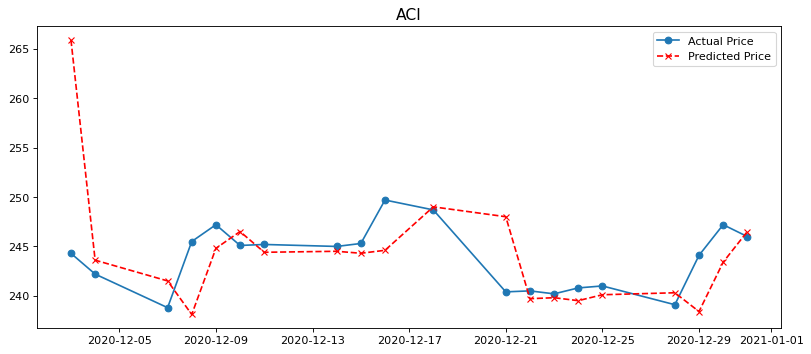

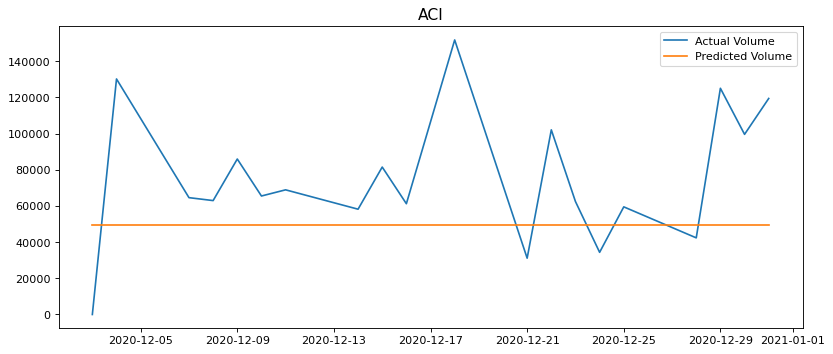

In [42]:
lastN = 20
predicted_prices = []
predicted_dates = []
predicted_volumes = []
actual_volumes = []

for idx in range(lastN):
    state = hidden_states[lastN+idx]
    current_price = stocks[-lastN-1+idx][1]
    volume = stocks[-lastN-1+idx][2]
    actual_volumes.append(volume)
    current_date = datetime.date.fromordinal(dates[-lastN+idx])
    predicted_date = current_date + datetime.timedelta(days=1)
    predicted_dates.append(predicted_date)
    predicted_prices.append(current_price + expected_returns[state])
    predicted_volumes.append(np.round(expected_volumes[state]))    

#Returns
plt.figure(figsize=(12, 5), dpi=80) 
plt.title(company_code, fontsize = 14)
plt.plot(predicted_dates,close_price[-lastN:], 'o-')
plt.plot(predicted_dates,predicted_prices,'rx--')
plt.legend(['Actual Price','Predicted Price'])
plt.show()

#Volumes
plt.figure(figsize=(12, 5), dpi=80) 
plt.title(company_code, fontsize = 14)
plt.plot(predicted_dates,actual_volumes)
plt.plot(predicted_dates,predicted_volumes)
plt.legend(['Actual Volume','Predicted Volume'])
plt.show()

In [43]:
#print('Actual:',close_price[-lastN:], '\n','Prediction:', predicted_prices )
actual_date = [datetime.date.fromordinal(x) for x in dates[-lastN:]]
data = list(zip(actual_date, close_price[-lastN:], predicted_prices))
data =  pd.DataFrame(data, columns=['Date','Actual Price', 'Predicted Price'])
#print((data.head()).to_markdown(tablefmt='grid'))
#pd.set_option("display.precision", 1)
data.head()

,Date,Actual Price,Predicted Price
0,2020-12-02,244.3,265.9088
1,2020-12-03,242.2,243.6088
2,2020-12-06,238.8,241.5088
3,2020-12-07,245.5,238.1088
4,2020-12-08,247.2,244.8088


In [46]:
abs_diff = np.abs(data['Actual Price'] - data['Predicted Price'])

MAE = np.mean(abs_diff)
MSE = np.mean(abs_diff ** 2)
RMSE = np.sqrt(MSE)
MAPE = np.mean(abs_diff*100/data['Actual Price'])

metrices = [MAE, RMSE, MAPE]

pd.set_option("display.precision", 4)
metrices = pd.DataFrame(metrices, index =['MAE', 'MSE', 'MAPE'], columns =['Score'])
metrices

,Score
MAE,3.3382
MSE,5.8141
MAPE,1.3672


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)